# Preliminary Data Report
## Preprocessing
The preprocessing was done in the integrate_and_clean.py file, which does a number of things. It was decided
that integration would be done before the clean up because those data structures would give access to an easier
way to do most of the cleaning functions
1. Integrations
    * Trailing spaces need to be removed for merging
    * Merges the user ratings to have an imdbId column so that the movies are easier to identify
    * Merges the several csv documents into a single dataframe so operations are simpler
    * Exports as lz4 because it has a fast compression algorithm
2. Cleanup
    * Removes unnecessary columns - budget, use_gross_income, worldwide_gross_income, metascore. These are all missing
too many of their rows to be worthwhile
    * Remove lower outliers from reviews_from_users, reviews_from_critics, voters, and remove all the outliers
from duration.
    * Removing movies that don't exist - a user reviews a movie that has an id that doesn't exist

## Data Exploration

This dataset has two tables that will be analysed. The first is the movie table, which includes the attributes of movies
from the IMDB website. The second is the ratings table, which includes the ratings given to various movies by users of
the website MovieLens.

Below is a sample of the movies table.

In [1]:
from useful_tools import pickle_manager
import bz2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movie_df = pickle_manager.load_pickle("../pickles/organised_movies.pickle.lz4")
movie_df.head(10)

,imdbId,title,original_title,date_published,genre,duration,country,language,director,writer,...,description,avg_vote,votes,usa_gross_income,worldwide_gross_income,budget,year,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,1894,-1,1,2
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,589,NaN,NaN,2250.0,1906,-1,7,7
2,tt0001892,Den sorte drøm,Den sorte drøm,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,1911,-1,5,2
3,tt0002101,Cleopatra,Cleopatra,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,The fabled queen of Egypt's affair with Roman ...,5.2,446,NaN,NaN,45000.0,1912,-1,25,3
4,tt0002130,L'Inferno,L'Inferno,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,1911,-1,31,14
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,"An account of the life of Jesus Christ, based ...",5.7,484,NaN,NaN,NaN,1912,-1,13,5
6,tt0002423,Madame DuBarry,Madame DuBarry,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",...,"The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,1919,-1,12,9
7,tt0002445,Quo Vadis?,Quo Vadis?,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,"Henryk Sienkiewicz, Enrico Guazzoni",...,"An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,NaN,NaN,45000.0,1913,-1,7,5
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu","Aristide Demetriade, Petre Liciu",...,The movie depicts the Romanian War of Independ...,6.7,198,NaN,NaN,400000.0,1912,-1,4,1
9,tt0002461,Richard III,Richard III,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",...,Richard of Gloucester uses manipulation and mu...,5.5,225,NaN,NaN,30000.0,1912,-1,8,1


Below is a sample of the ratings database. The movies from the ratings database are linked to the IMDB database through
the IMDB ID.


In [2]:
rating_df = pickle_manager.load_pickle("../pickles/organised_ratings.pickle.lz4")
rating_df.head(10)

,userId,rating,imdbId
0,1,4.0,tt0114709
1,1,4.0,tt0113228
2,1,4.0,tt0113277
3,1,5.0,tt0114369
4,1,5.0,tt0114814
5,1,3.0,tt0116367
6,1,5.0,tt0115734
7,1,4.0,tt0112573
8,1,5.0,tt0114287
9,1,5.0,tt0109370


#### Attribute Types
Below are the data types of attributes in both tables. Note: types listed as "object" are strings, and genre and actors
are sets of strings.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("MOVIES")
print(movie_df.dtypes)
print("         ")
print("RATINGS")
print(rating_df.dtypes)

MOVIES
imdbId                     object
title                      object
original_title             object
date_published             object
genre                      object
duration                    int32
country                    object
language                   object
director                   object
writer                     object
production_company         object
actors                     object
description                object
avg_vote                  float64
votes                       int32
usa_gross_income           object
worldwide_gross_income     object
budget                    float64
year                        int64
metascore                   int64
reviews_from_users          int64
reviews_from_critics        int64
dtype: object
         
RATINGS
userId      int64
rating    float64
imdbId     object
dtype: object


#### Data Dimensions

Below are the dimensions of both tables.

In [4]:
print("MOVIES")
print("Total Number of Attributes: ", movie_df.shape[1])
print("Total Number of Samples: ", movie_df.shape[0])
print("Total Number of Cells: ", movie_df.size)

print("RATINGS")
print("Total Number of Attributes: ", rating_df.shape[1])
print("Total Number of Samples: ", rating_df.shape[0])
print("Total Number of Cells: ", rating_df.size)

MOVIES
Total Number of Attributes:  22
Total Number of Samples:  85855
Total Number of Cells:  1888810
RATINGS
Total Number of Attributes:  3
Total Number of Samples:  100836
Total Number of Cells:  302508


#### Data Summaries

Below are the basic summaries of both datasets' categories. The numerical categories have five number summaries,
while the categorical categories have their unique values listed.

In [14]:
print("MOVIES")
print(movie_df.mask(movie_df == -1).describe())

print("RATINGS")
print(rating_df.mask(rating_df == -1).describe())

print(rating_df['userId'].unique())

MOVIES
           duration      avg_vote         votes        budget          year  \
count  85855.000000  85855.000000  8.585500e+04  2.371000e+04  85855.000000   
mean     100.351418      5.898656  9.493490e+03  1.057123e+08   1993.500891   
std       22.553848      1.234987  5.357436e+04  2.770747e+09     24.216420   
min       41.000000      1.000000  9.900000e+01  0.000000e+00   1894.000000   
25%       88.000000      5.200000  2.050000e+02  7.927500e+05   1979.000000   
50%       96.000000      6.100000  4.840000e+02  3.000000e+06   2003.000000   
75%      108.000000      6.800000  1.766500e+03  1.500000e+07   2013.000000   
max      808.000000      9.900000  2.278845e+06  3.500000e+11   2020.000000   

          metascore  reviews_from_users  reviews_from_critics  
count  13305.000000        78258.000000          74058.000000  
mean      55.896881           46.040826             27.479989  
std       17.784874          178.511411             58.339158  
min        1.000000      

In [6]:
print("MOVIES")
for (columnName, columnData) in movie_df.iteritems():
    if columnName in ["actors", "genre", "userId"] or movie_df[columnName].dtypes in [np.float64, np.int32, np.int64]:
        continue
    print(columnName)
    print(pd.unique(movie_df[columnName]))
print("    ")

print("RATINGS")
for (columnName, columnData) in rating_df.iteritems():
    if columnName in ["actors", "genre", "userId"] or rating_df[columnName].dtypes in [np.float64, np.int32, np.int64]:
        continue
    print(columnName)
    print(pd.unique(rating_df[columnName]))

MOVIES
imdbId
['tt0000009' 'tt0000574' 'tt0001892' ... 'tt9911774' 'tt9914286'
 'tt9914942']
title
['Miss Jerry' 'The Story of the Kelly Gang' 'Den sorte drøm' ...
 'Padmavyuhathile Abhimanyu' 'Sokagin Çocuklari'
 'La vida sense la Sara Amat']
original_title
['Miss Jerry' 'The Story of the Kelly Gang' 'Den sorte drøm' ...
 'Padmavyuhathile Abhimanyu' 'Sokagin Çocuklari'
 'La vida sense la Sara Amat']
date_published
['1894-10-09' '1906-12-26' '1911-08-19' ... '2020-10-22' '2019-01-13'
 '2020-09-04']
country
['USA' 'Australia' 'Germany, Denmark' ...
 'Iran, France, Germany, Switzerland, Luxembourg, Lebanon'
 'Spain, Portugal, Argentina' 'India, Netherlands, Singapore']
language
['None' nan 'English' ... 'Persian, Urdu' 'English, Swiss German, German'
 'English, Polish, Russian, German']
director
['Alexander Black' 'Charles Tait' 'Urban Gad' ... 'Ludovic Colbeau-Justin'
 'Vineesh Aaradya' 'Laura Jou']
writer
['Alexander Black' 'Charles Tait' 'Urban Gad, Gebhard Schätzler-Perasini'
 ... 'V

## Data Pre-preparation

## Data Visualisation

Below are the visualisations of both datasets' numerical categories.

### Movies

Scatter plot of the durations


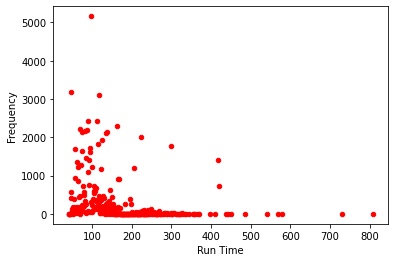

Histogram of duration divided into 10 bins


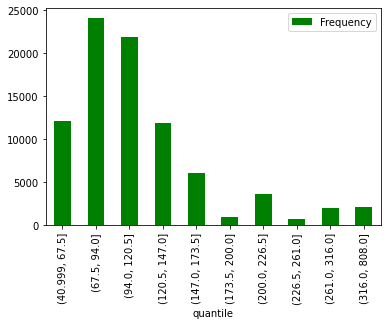

Box plot of the durations


C:\Users\nicol\AppData\Local\Temp/ipykernel_53532/2595673421.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df.columns.difference(['duration']), 1, inplace=False)


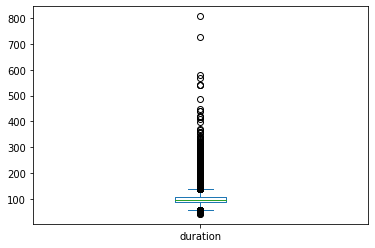

In [7]:
d = movie_df.groupby('duration')['imdbId'].nunique()
f = []

for value in d:
    f.insert(-1, value)

d = {'Run Time': movie_df['duration'].unique(), 'Frequency': f}
df = pd.DataFrame(data=d)

print("Scatter plot of the durations")
df.plot.scatter(stacked=True, x='Run Time', y='Frequency', color="r")
plt.show()

df['quantile'] = pd.qcut(df['Run Time'], q=10)

df = df.drop(['Run Time'], axis=1)

df = df.groupby('quantile').agg('sum')

print("Histogram of duration divided into 10 bins")
df.plot.bar(stacked=True, color="g")
plt.show()

df = movie_df
df = df.drop(df.columns.difference(['duration']), 1, inplace=False)

print("Box plot of the durations")
df.plot.box(stacked=True)
plt.show()



Scatter plot of the average votes


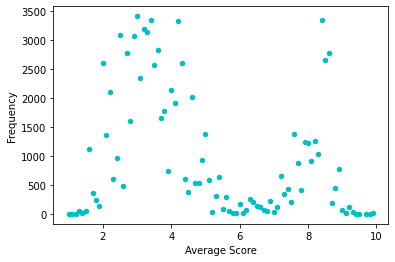

Histogram of average scores divided into 10 bins


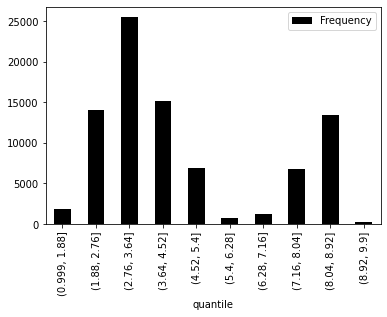

Box plot of the average votes


C:\Users\nicol\AppData\Local\Temp/ipykernel_53532/3423403184.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df.columns.difference(['avg_vote']), 1, inplace=False)


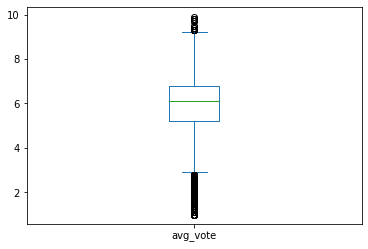

In [8]:
#########################################################################
d = movie_df.groupby('avg_vote')['imdbId'].nunique()
f = []

for value in d:
    f.insert(-1, value)

d = {'Average Score': movie_df['avg_vote'].unique(), 'Frequency': f}
df = pd.DataFrame(data=d)

print("Scatter plot of the average votes")
df.plot.scatter(stacked=True, x='Average Score', y='Frequency', color="c")
plt.show()

df['quantile'] = pd.qcut(df['Average Score'], q=10)

df = df.drop(['Average Score'], axis=1)

df = df.groupby('quantile').agg('sum')

print("Histogram of average scores divided into 10 bins")
df.plot.bar(stacked=True, color="k")
plt.show()

df = movie_df
df = df.drop(df.columns.difference(['avg_vote']), 1, inplace=False)

print("Box plot of the average votes")
df.plot.box(stacked=True)
plt.show()

Scatter plot of votes


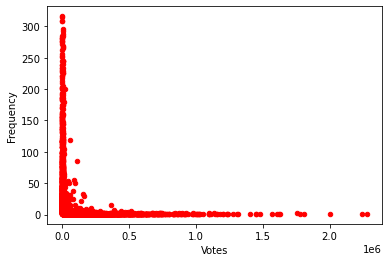

Histogram of votes divided into 10 bins


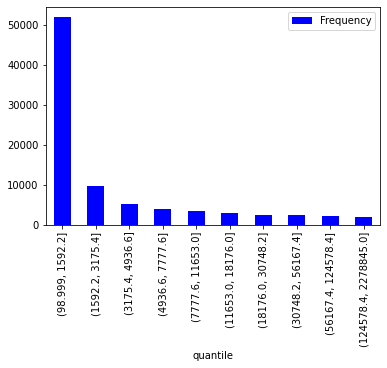

Box plot of the votes


C:\Users\nicol\AppData\Local\Temp/ipykernel_53532/3218413044.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df.columns.difference(['votes']), 1, inplace=False)


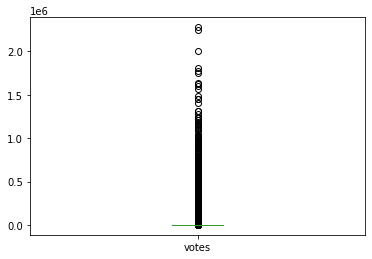

In [9]:
#########################################################################
d = movie_df.groupby('votes')['imdbId'].nunique()
f = []

for value in d:
    f.insert(-1, value)

d = {'Votes': movie_df['votes'].unique(), 'Frequency': f}
df = pd.DataFrame(data=d)

print("Scatter plot of votes")
df.plot.scatter(stacked=True, x='Votes', y='Frequency', color='r')
plt.show()

df['quantile'] = pd.qcut(df['Votes'], q=10)

df = df.drop(['Votes'], axis=1)

df = df.groupby('quantile').agg('sum')

print("Histogram of votes divided into 10 bins")
df.plot.bar(stacked=True, color='b')
plt.show()

df = movie_df
df = df.drop(df.columns.difference(['votes']), 1, inplace=False)

print("Box plot of the votes")
df.plot.box(stacked=True)
plt.show()


Scatter plot of years


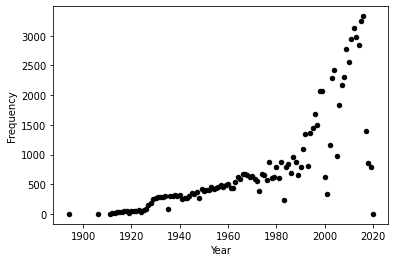

Box plot of years


C:\Users\nicol\AppData\Local\Temp/ipykernel_53532/1275319587.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df.columns.difference(['year']), 1, inplace=False)


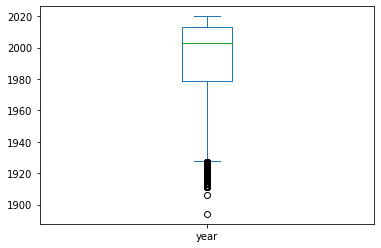

In [10]:
#########################################################################
d = movie_df.groupby('year')['imdbId'].nunique()
f = []

for value in d:
    f.insert(-1, value)

d = {'Year': movie_df['year'].unique(), 'Frequency': f}
df = pd.DataFrame(data=d)

print("Scatter plot of years")
df.plot.scatter(stacked=True, x='Year', y='Frequency', color='k')
plt.show()

df = movie_df
df = df.drop(df.columns.difference(['year']), 1, inplace=False)

print("Box plot of years")
df.plot.box(stacked=True)
plt.show()

Scatter plot of review from users


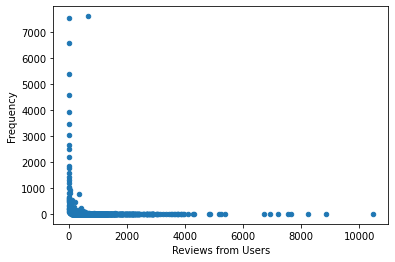

Histogram of review from users divided into 10 bins


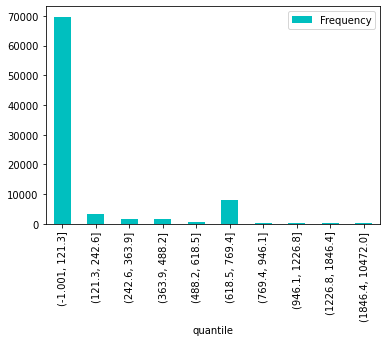

Box plot of the review from users


C:\Users\nicol\AppData\Local\Temp/ipykernel_53532/482241214.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df.columns.difference(['reviews_from_users']), 1, inplace=False)


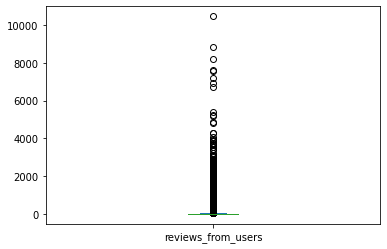

In [11]:
#########################################################################
d = movie_df.groupby('reviews_from_users')['imdbId'].nunique()
f = []

for value in d:
    f.insert(-1, value)

d = {'Reviews from Users': movie_df['reviews_from_users'].unique(), 'Frequency': f}
df = pd.DataFrame(data=d)

print("Scatter plot of review from users")
df.plot.scatter(stacked=True, x='Reviews from Users', y='Frequency')
plt.show()

df['quantile'] = pd.qcut(df['Reviews from Users'], q=10)

df = df.drop(['Reviews from Users'], axis=1)

df = df.groupby('quantile').agg('sum')

print("Histogram of review from users divided into 10 bins")
df.plot.bar(stacked=True, color='c')
plt.show()

df = movie_df
df = df.drop(df.columns.difference(['reviews_from_users']), 1, inplace=False)

print("Box plot of the review from users")
df.plot.box(stacked=True)
plt.show()


Scatter plot of review from critics


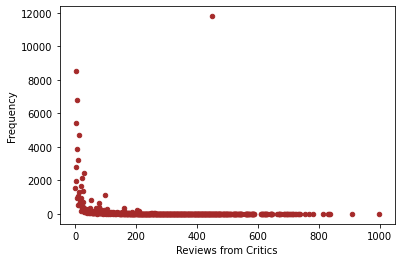

Histogram of review from critics divided into 10 bins


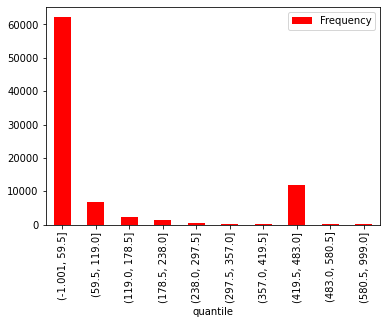

Box plot of the reviews from critics


C:\Users\nicol\AppData\Local\Temp/ipykernel_53532/2295098823.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df.columns.difference(['reviews_from_critics']), 1, inplace=False)


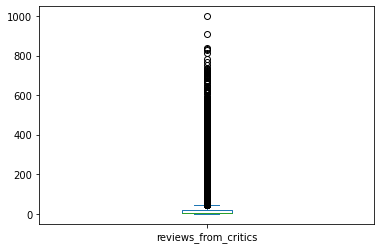

In [12]:
#########################################################################
d = movie_df.groupby('reviews_from_critics')['imdbId'].nunique()
f = []

for value in d:
    f.insert(-1, value)

d = {'Reviews from Critics': movie_df['reviews_from_critics'].unique(), 'Frequency': f}
df = pd.DataFrame(data=d)

print("Scatter plot of review from critics")
df.plot.scatter(stacked=True, x='Reviews from Critics', y='Frequency', color='brown')
plt.show()

df['quantile'] = pd.qcut(df['Reviews from Critics'], q=10)

df = df.drop(['Reviews from Critics'], axis=1)

df = df.groupby('quantile').agg('sum')

print("Histogram of review from critics divided into 10 bins")
df.plot.bar(stacked=True, color='r')
plt.show()

df = movie_df
df = df.drop(df.columns.difference(['reviews_from_critics']), 1, inplace=False)

print("Box plot of the reviews from critics")
df.plot.box(stacked=True)
plt.show()

### Ratings


Graph of the ratings


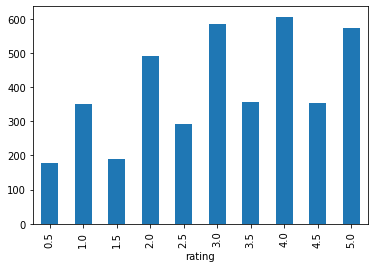

Pie graph of ratings


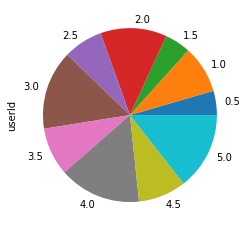

Box plot of the ratings


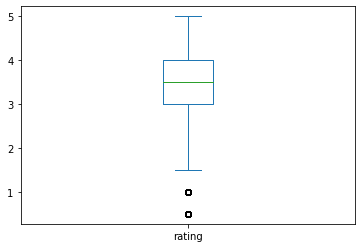

In [13]:
df = rating_df
df = df.drop(['imdbId'], axis=1)

df = df.groupby('rating')['userId'].nunique()

print("Graph of the ratings")
df.plot.bar(stacked=True)
plt.show()

print("Pie graph of ratings")
df.plot.pie(stacked=True)
plt.show()

df = rating_df
df = df.drop(['userId', 'imdbId'], axis=1)

print("Box plot of the ratings")
df.plot.box(stacked=True)
plt.show()